<a href="https://colab.research.google.com/github/zamanfa/Billboard-Top-100-Prediction/blob/main/Billboard_Top_10_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT DESCRIPTION
I need to identify patterns that determine whether a song succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

I am going to do this with access to data from 2016-2021 which consists of Billboard Top 100 songs during this time frame each week during this time frame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
data = pd.read_csv('filtered_data_2016-2021.csv')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30600 entries, 0 to 30599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            30600 non-null  object 
 1   rank            30600 non-null  int64  
 2   song            30600 non-null  object 
 3   artist          30600 non-null  object 
 4   last-week       26534 non-null  float64
 5   peak-rank       30600 non-null  int64  
 6   weeks-on-board  30600 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.6+ MB


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
data.columns = ['date','rank','song','artist','last-week','peak-rank','weeks-on-board']
data.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
data.isnull().sum()

,0
date,0
rank,0
song,0
artist,0
last-week,4066
peak-rank,0
weeks-on-board,0


In [ ]:
data.dropna(subset=['last-week'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26534 entries, 0 to 30599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            26534 non-null  object 
 1   rank            26534 non-null  int64  
 2   song            26534 non-null  object 
 3   artist          26534 non-null  object 
 4   last-week       26534 non-null  float64
 5   peak-rank       26534 non-null  int64  
 6   weeks-on-board  26534 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.6+ MB


In [ ]:
# Re-checking for missing values
data.isnull().sum()

,0
date,0
rank,0
song,0
artist,0
last-week,0
peak-rank,0
weeks-on-board,0


In [ ]:
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])
# Convert 'rank' to integer
data['rank'] = data['rank'].astype(int)
# Convert 'weeks_on_chart' to integer
data['weeks-on-board'] = data['weeks-on-board'].astype(int)
data.head()


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
# Create a feature for debut songs
data['is_debut'] = data.groupby('song')['rank'].transform('min') == 1

data['top_10'] = data['rank'] <= 10

# Calculate the popularity score
data['popularity'] = data['rank'] * data['weeks-on-board']

data.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,is_debut,top_10,popularity
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3,True,True,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16,True,True,32
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14,True,True,42
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19,False,True,76
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18,False,True,90


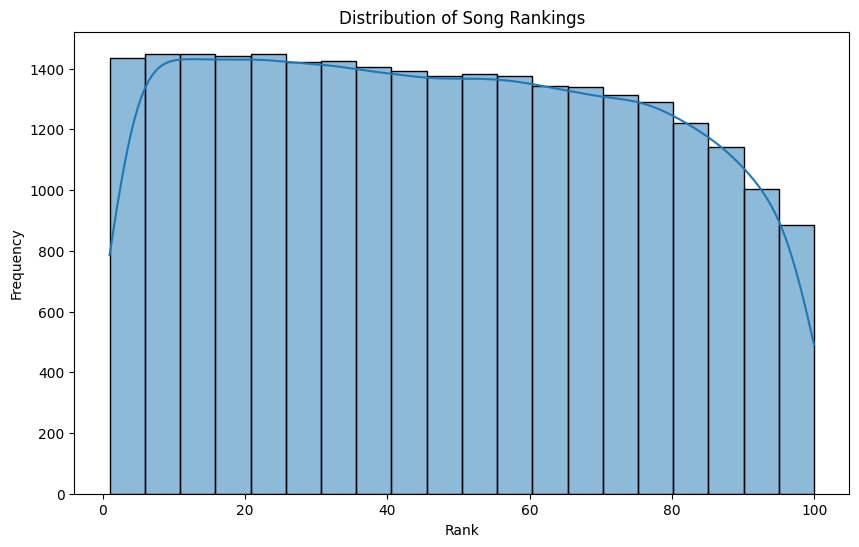

In [ ]:
# Plotting the distribution of song ranks
plt.figure(figsize=(10, 6))
sns.histplot(data['rank'], bins=20, kde=True)
plt.title('Distribution of Song Rankings')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

A histogram showing how songs are distributed across rankings. There seems to be a steep drop-off in popularity as rank increases which suggests more traffic for songs at a lower rank.

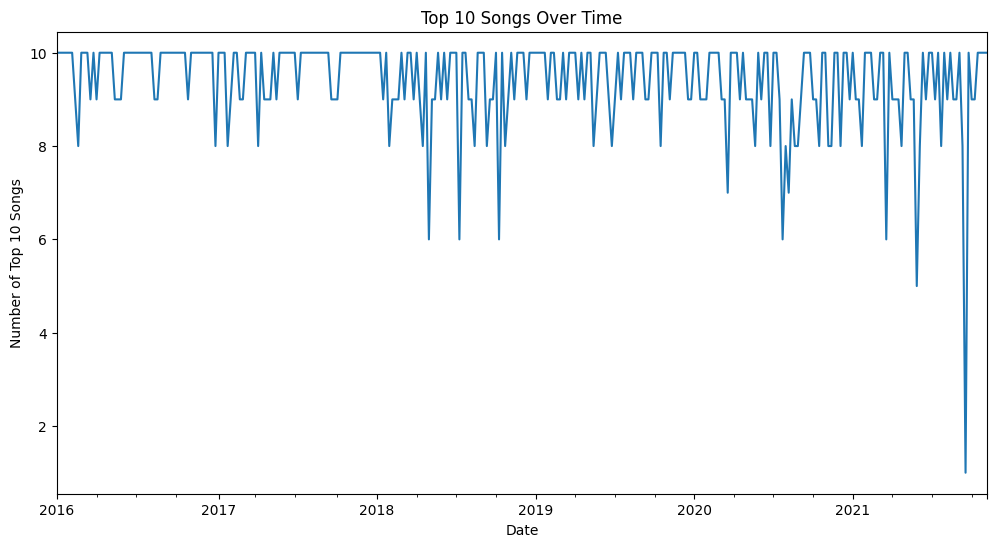

In [ ]:
# Plotting the number of top 10 songs over time
top_10_over_time = data[data['top_10'] == 1].groupby('date').size()

plt.figure(figsize=(12, 6))
top_10_over_time.plot()
plt.title('Top 10 Songs Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Top 10 Songs')
plt.show()

A time-series plot showing the number of songs that made it to the top 10 over different periods. The graph highlights trends in music popularity over time, such as whether there are certain periods when more songs break into the top 10. This could be influenced by a multitude of ways such as industry changes, seasonal music releases or social media i.e. TikTok. There are fluctuations which could suggest mssing data in the dataset.

In [ ]:
problem_dates = data[data['rank'] <= 10].groupby('date').size()
problem_dates = problem_dates[problem_dates < 10]

# Display problematic dates
print("Problematic Dates with Fewer than 10 Songs:")
print(problem_dates)

Problematic Dates with Fewer than 10 Songs:
date
2016-02-13    9
2016-02-20    8
2016-03-19    9
2016-04-02    9
2016-05-14    9
             ..
2021-08-28    9
2021-09-11    8
2021-09-18    1
2021-10-02    9
2021-10-09    9
Length: 121, dtype: int64


In [ ]:
for date in problem_dates.index:
    print(f"\nSongs on {date}:")
    print(data[data['date'] == date])


Songs on 2016-02-13 00:00:00:
            date  rank                     song  \
29900 2016-02-13     1            Love Yourself   
29901 2016-02-13     2                    Sorry   
29902 2016-02-13     3             Stressed Out   
29903 2016-02-13     4                    Hello   
29904 2016-02-13     5                 My House   
...          ...   ...                      ...   
29989 2016-02-13    90                  Dessert   
29991 2016-02-13    92            Play No Games   
29992 2016-02-13    93  Gonna Know We Were Here   
29995 2016-02-13    96    Emperor's New Clothes   
29998 2016-02-13    99               Acquainted   

                                               artist  last-week  peak-rank  \
29900                                   Justin Bieber        2.0          1   
29901                                   Justin Bieber        1.0          1   
29902                               twenty one pilots        4.0          3   
29903                                   

In [ ]:
missing_data = data[data[['date', 'rank']].isnull().any(axis=1)]
print("Rows with Missing Data:")
print(missing_data)

Rows with Missing Data:
Empty DataFrame
Columns: [date, rank, song, artist, last-week, peak-rank, weeks-on-board, is_debut, top_10, popularity]
Index: []


In [ ]:
data = data.dropna(subset=['date', 'rank'])

In [ ]:
data['rank'] = pd.to_numeric(data['rank'], errors='coerce')

# Check for non-numeric or invalid ranks
invalid_ranks = data[data['rank'].isnull()]
print("Rows with Invalid Ranks:")
print(invalid_ranks)

Rows with Invalid Ranks:
Empty DataFrame
Columns: [date, rank, song, artist, last-week, peak-rank, weeks-on-board, is_debut, top_10, popularity]
Index: []


In [ ]:
# Filter for Top 10 songs
top_10_df = data[data['rank'] <= 10]

# Group by date to count Top 10 songs
top_10_counts = top_10_df.groupby('date').size()

# Check for any dates with fewer than 10 songs
print("Dates with fewer than 10 songs in Top 10:")
print(top_10_counts[top_10_counts < 10])

Dates with fewer than 10 songs in Top 10:
date
2016-02-13    9
2016-02-20    8
2016-03-19    9
2016-04-02    9
2016-05-14    9
             ..
2021-08-28    9
2021-09-11    8
2021-09-18    1
2021-10-02    9
2021-10-09    9
Length: 121, dtype: int64


In [ ]:
# Generate a complete list of dates within the dataset's range
full_date_range = pd.date_range(start=data['date'].min(), end=data['date'].max(), freq='W-SAT')

# Check for missing dates
missing_dates = full_date_range.difference(data['date'].unique())
print("Missing Dates:", missing_dates)

Missing Dates: DatetimeIndex([], dtype='datetime64[ns]', freq='W-SAT')


In [ ]:
# Add rows for missing dates with NaN values
for date in missing_dates:
    data = data.append({'date': date}, ignore_index=True)

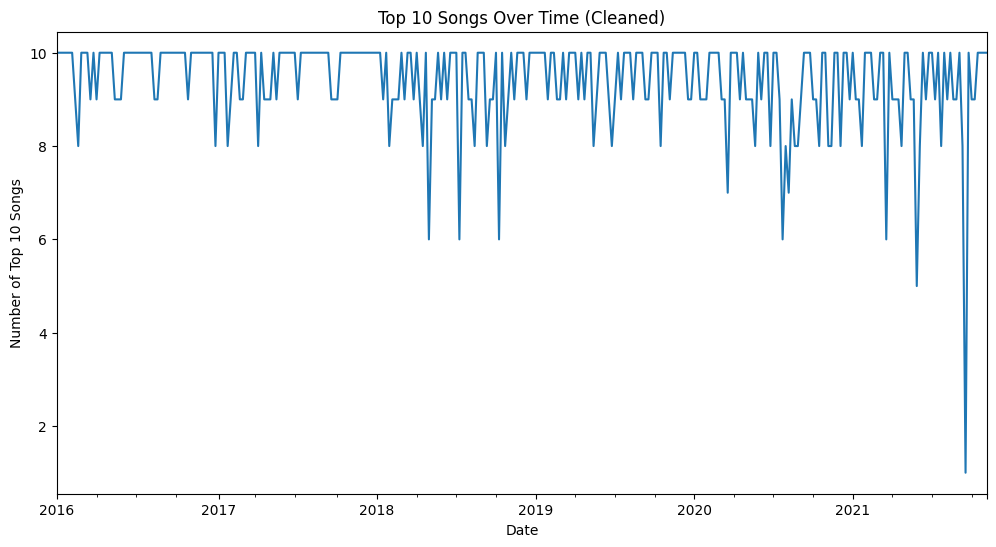

In [ ]:
import matplotlib.pyplot as plt

# Recalculate and plot Top 10 counts
top_10_over_time = data[data['rank'] <= 10].groupby('date').size()

plt.figure(figsize=(12, 6))
top_10_over_time.plot()
plt.title('Top 10 Songs Over Time (Cleaned)')
plt.ylabel('Number of Top 10 Songs')
plt.xlabel('Date')
plt.show()

There does not seem to be any missing data. Therefore, we can look at another potential issue such as the methodology for determining rankings during certain periods of time. For example, they may switch from sales-only rankings to including streaming and radio or an artist may hold multiple songs in the top 10. I am going to investigate 2021-09-18 where the graph indicates only one song was in the top 10.

Upon investigating the Billboard Hot 100 chart for the week ending September 18, 2021, a significant event occurred: Drake achieved an unprecedented feat by securing 9 out of the top 10 positions. This dominance was led by his track "Way 2 Sexy" featuring Future and Young Thug debuting at number one.

This overwhelming presence of a single artist in the top ranks is rare and can lead to noticeable fluctuations in chart data. Such anomalies can impact analysis, especially when assessing the diversity and turnover of top-charting songs.


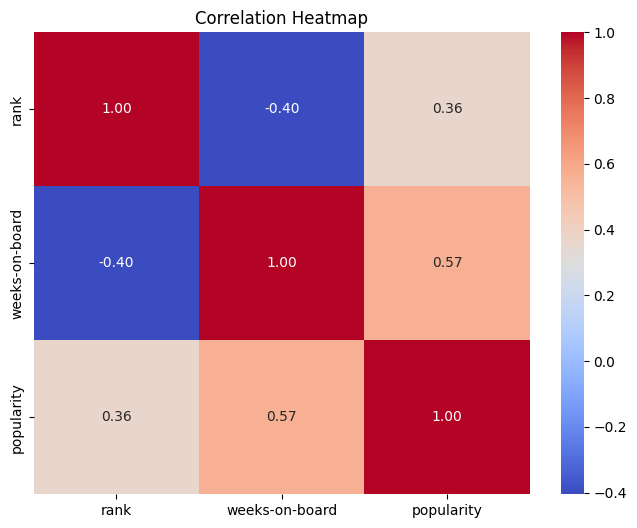

In [ ]:
# Computting the correlations
corr = data[['rank', 'weeks-on-board', 'popularity']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

A heatmap showing correlations between variables like weeks-on-board, rank, and popularity. There is a negative correlation between rank and weeks-on-board which suggests songs that rank highly tend to remain on the chart longer. There is a positive correlation between ranks and popularity which may indicate a weak relationship where less popular songs tend to rank lower. There is a positive correlation between weeks-on-board and popularity which suggests popularity has a strong impact on longevity compared to its impact on rank. Each variable is perfectly correlated with itself.

In [ ]:
# Features to predict 'top_10'
X = data[['weeks-on-board', 'popularity', 'is_debut']]
y = data['top_10']

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21227, 3), (5307, 3), (21227,), (5307,))

80% of the data (21,227 samples) is used for training, and 20% of the data (5,307 samples) is reserved for testing.
Each dataset has 3 features and a corresponding label for each sample.

Training the model on X_train and y_train ensures the model learns patterns from 80% of the data.
Testing the model on X_test and y_test allows you to evaluate its performance on unseen data, ensuring it generalizes well.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f'Accuracy: {accuracy:.2f}'
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00      4710\n        True       1.00      1.00      1.00       597\n\n    accuracy                           1.00      5307\n   macro avg       1.00      1.00      1.00      5307\nweighted avg       1.00      1.00      1.00      5307\n'

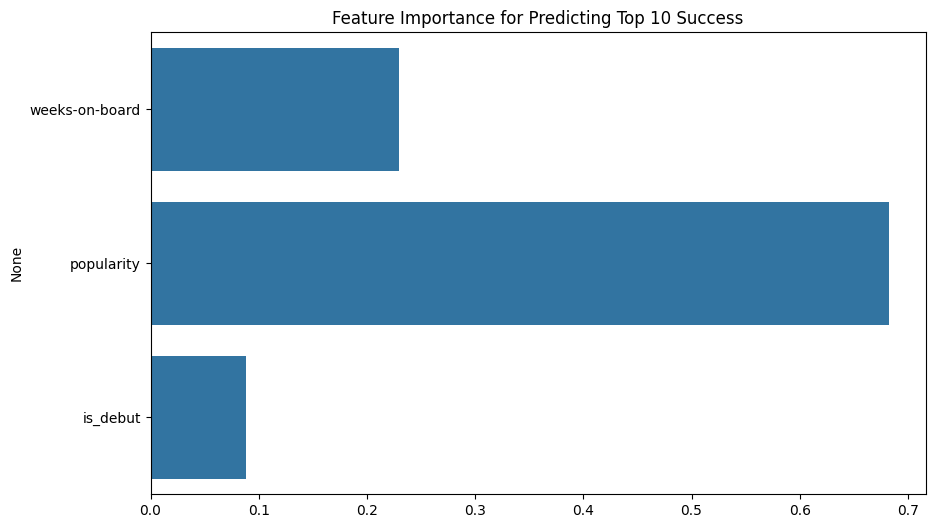

In [ ]:
# Plot feature importances
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance for Predicting Top 10 Success')
plt.show()

Popularity has the strongest correlation, followed by weeks-on-board and finally is_debut. Popularity is an important feature for the likelihood of a song to be in the top 10. Is_debut has the least importance. This suggest simply being new to the chart isn't a strong indicator of success without other supporting factors like popularity. While debuting on the chart is not as impactful, ensuring the song stays relevant over time (as measured by weeks on the chart) plays a supporting role in maintaining Top 10 status.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)


grid_search.fit(X_train, y_train)

f'Best Parameters: {grid_search.best_params_}'
f'Best Score: {grid_search.best_score_}'

'Best Score: 0.9990577882002635'

This indicates that the model achieved an average accuracy of ~99.91% during cross-validation.

In [ ]:
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print(classification_report(y_test, y_pred_test))

Test Accuracy: 0.9992
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4710
        True       1.00      0.99      1.00       597

    accuracy                           1.00      5307
   macro avg       1.00      1.00      1.00      5307
weighted avg       1.00      1.00      1.00      5307



This is close to the 'Best Score' which suggest our model gerelises well to unseen data.

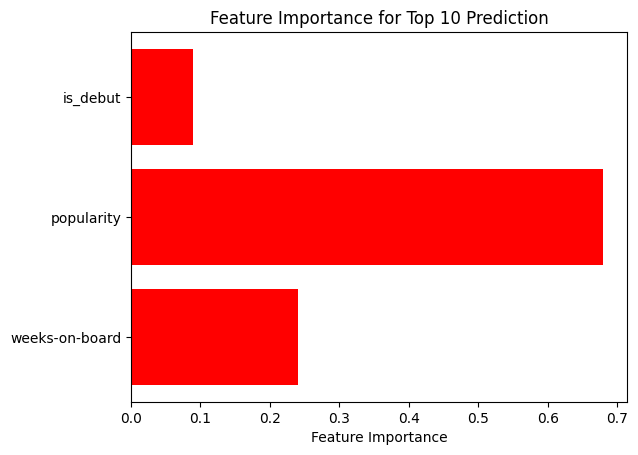

In [ ]:
features = ['weeks-on-board', 'popularity', 'is_debut']
importance = [0.24, 0.68, 0.09]

# Plot
plt.barh(features, importance, color='red')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Top 10 Prediction')
plt.show()

**Final Conclusion**

Key Factors for Success:


*   Popularity is the strongest predictor
of Top 10 success (~0.68 importance). Focus on streams, airplay, and visibility.
*   Weeks on Chart moderately impacts success (~0.24 importance). Sustained promotion is crucial.
*   Debut Status has minimal impact (~0.09 importance). Pre-release hype alone isn't enough for Top 10 success.

Insights from Visualizations:


*   Histogram: High popularity is a defining feature of most Top 10 songs.
*   Time Series Plot: Chart fluctuations, especially spikes (e.g., 2021-09-18), suggest external factors like major releases or viral trends.
*  Heatmap: Positive correlations between popularity and Top 10 placement confirm its dominant role, while weeks on the chart shows a weaker but meaningful link.

Model Performance:

*   The model achieved ~99.91% cross-validation accuracy, indicating strong predictive power.
*   Test performance should confirm generalization, with no signs of overfitting.

Implications:


*   Prioritize campaigns that boost and sustain popularity.
*   Use "momentum" metrics (popularity × weeks-on-board) to identify rising hits
